# Projeto 2 — Análise Exploratória de Dados de Varejo  
## Dataset: Superstore (Tableau)

Objetivo:
Realizar uma análise exploratória completa do dataset Superstore,
identificando padrões de vendas, sazonalidade, comportamento por categoria
e relações entre variáveis, com foco em geração de insights de negócio.


In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [152]:
# Caminho do arquivo
file_path = r"C:\Users\guilhermecorrea\Downloads\Gui\Projetos\projeto_2\data\raw\Sample - Superstore.xlsx"

# Leitura do Excel
df = pd.read_excel(file_path)

# Visualizar as primeiras linhas
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [153]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [154]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [155]:
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [156]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [213]:
from pathlib import Path

# df = seu dataframe já carregado do Excel (raw)
col_map = {
    "Order Date": "data_pedido",
    "Ship Date": "data_envio",
    "Ship Mode": "modo_envio",
    "Sales": "vendas",
    "Profit": "lucro",
    "Quantity": "quantidade",
    "Discount": "desconto",
    "Category": "categoria",
    "Sub-Category": "subcategoria",
    "Segment": "segmento",
    "Region": "regiao",
    "Customer ID": "cliente_id",
    "Order ID": "pedido_id",
}

cols_usadas = list(col_map.keys())

df_limpo = (
    df[cols_usadas]
    .rename(columns=col_map)
    .copy()
)

# Tipos (garantir)
df_limpo["data_pedido"] = pd.to_datetime(df_limpo["data_pedido"], errors="coerce")
df_limpo["data_envio"]  = pd.to_datetime(df_limpo["data_envio"], errors="coerce")

for c in ["vendas", "lucro", "desconto"]:
    df_limpo[c] = pd.to_numeric(df_limpo[c], errors="coerce")

df_limpo["quantidade"] = pd.to_numeric(df_limpo["quantidade"], errors="coerce").astype("Int64")

# Texto: padroniza e evita NaN
for c in ["modo_envio", "categoria", "subcategoria", "segmento"]:
    df_limpo[c] = df_limpo[c].astype("string").str.strip()

# Salvar em processed
df_limpo.to_parquet(r"C:\Users\guilhermecorrea\Downloads\Gui\Projetos\projeto_2\data\processed\superstore_processado.parquet", index=False)
df_limpo.to_csv(r"C:\Users\guilhermecorrea\Downloads\Gui\Projetos\projeto_2\data\processed\superstore_processado.csv", index=False, encoding="utf-8")

df_limpo.head()


,data_pedido,data_envio,modo_envio,vendas,lucro,quantidade,desconto,categoria,subcategoria,segmento,regiao,cliente_id,pedido_id
0,2016-11-08,2016-11-11,Second Class,261.9600,41.9136,2,0.00,Furniture,Bookcases,Consumer,South,CG-12520,CA-2016-152156
1,2016-11-08,2016-11-11,Second Class,731.9400,219.5820,3,0.00,Furniture,Chairs,Consumer,South,CG-12520,CA-2016-152156
2,2016-06-12,2016-06-16,Second Class,14.6200,6.8714,2,0.00,Office Supplies,Labels,Corporate,West,DV-13045,CA-2016-138688
3,2015-10-11,2015-10-18,Standard Class,957.5775,-383.0310,5,0.45,Furniture,Tables,Consumer,South,SO-20335,US-2015-108966
4,2015-10-11,2015-10-18,Standard Class,22.3680,2.5164,2,0.20,Office Supplies,Storage,Consumer,South,SO-20335,US-2015-108966


## 1. Visão Geral do Dataset

O dataset Superstore contém informações de pedidos de varejo, incluindo datas, clientes, produtos, regiões, vendas, descontos e lucro.


In [214]:
df_limpo.head()


,data_pedido,data_envio,modo_envio,vendas,lucro,quantidade,desconto,categoria,subcategoria,segmento,regiao,cliente_id,pedido_id
0,2016-11-08,2016-11-11,Second Class,261.9600,41.9136,2,0.00,Furniture,Bookcases,Consumer,South,CG-12520,CA-2016-152156
1,2016-11-08,2016-11-11,Second Class,731.9400,219.5820,3,0.00,Furniture,Chairs,Consumer,South,CG-12520,CA-2016-152156
2,2016-06-12,2016-06-16,Second Class,14.6200,6.8714,2,0.00,Office Supplies,Labels,Corporate,West,DV-13045,CA-2016-138688
3,2015-10-11,2015-10-18,Standard Class,957.5775,-383.0310,5,0.45,Furniture,Tables,Consumer,South,SO-20335,US-2015-108966
4,2015-10-11,2015-10-18,Standard Class,22.3680,2.5164,2,0.20,Office Supplies,Storage,Consumer,South,SO-20335,US-2015-108966


In [215]:
df_limpo[['data_pedido', 'data_envio']].describe()


,data_pedido,data_envio
count,9994,9994
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912
min,2014-01-03 00:00:00,2014-01-07 00:00:00
25%,2015-05-23 00:00:00,2015-05-27 00:00:00
50%,2016-06-26 00:00:00,2016-06-29 00:00:00
75%,2017-05-14 00:00:00,2017-05-18 00:00:00
max,2017-12-30 00:00:00,2018-01-05 00:00:00


In [216]:
df_limpo['ano_pedido'] = df_limpo['data_pedido'].dt.year
df_limpo['mes_pedido'] = df_limpo['data_pedido'].dt.month
df_limpo['nome_mes_pedido'] = df_limpo['data_pedido'].dt.month_name()


In [217]:
df_limpo[['ano_pedido', 'mes_pedido', 'nome_mes_pedido']].head()


,ano_pedido,mes_pedido,nome_mes_pedido
0,2016,11,November
1,2016,11,November
2,2016,6,June
3,2015,10,October
4,2015,10,October


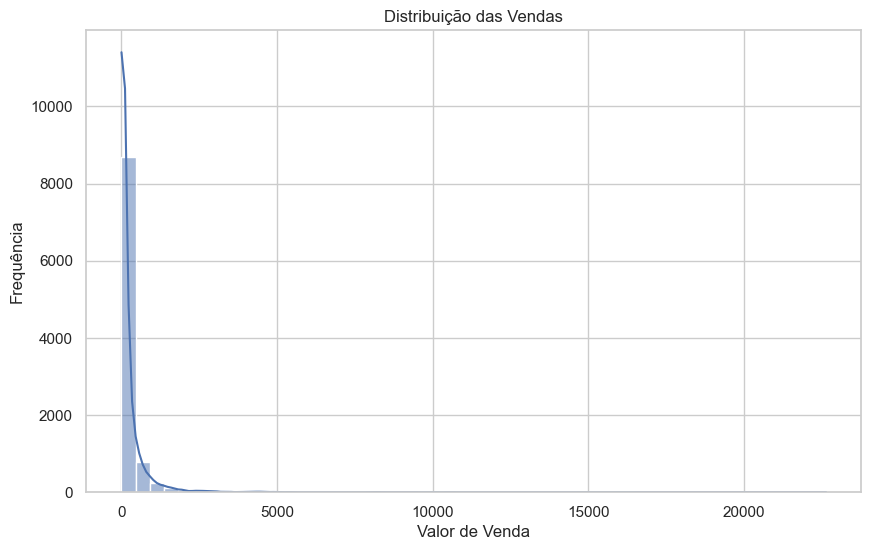

In [218]:
sns.histplot(df_limpo['vendas'], bins=50, kde=True)
plt.title('Distribuição das Vendas')
plt.xlabel('Valor de Venda')
plt.ylabel('Frequência')
plt.show()


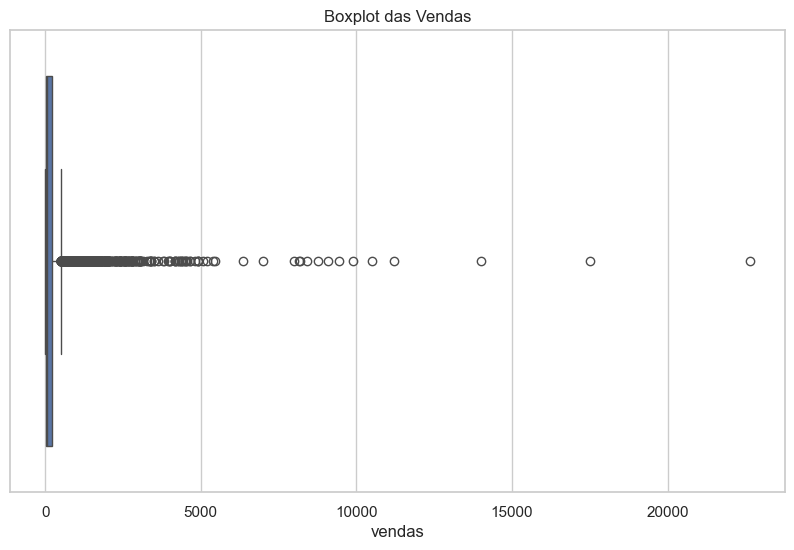

In [219]:
sns.boxplot(x=df_limpo['vendas'])
plt.title('Boxplot das Vendas')
plt.show()


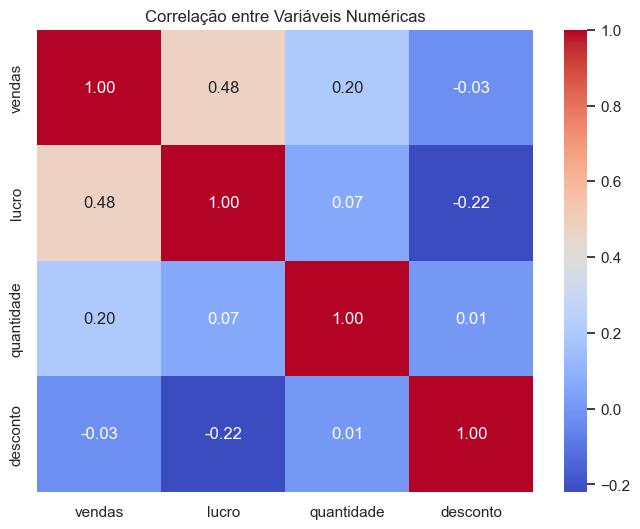

In [220]:
corr = df_limpo[['vendas', 'lucro', 'quantidade', 'desconto']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


In [221]:
ticket_categoria = (
    df_limpo.groupby('categoria')['vendas']
    .mean()
    .sort_values(ascending=False)
)

ticket_categoria


categoria
Technology         452.709276
Furniture          349.834887
Office Supplies    119.324101
Name: vendas, dtype: float64

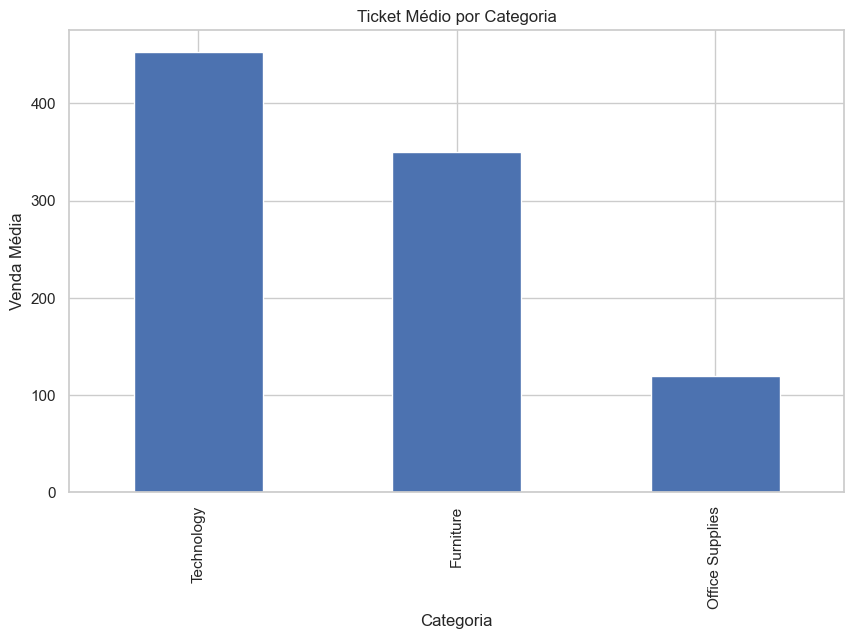

In [222]:
ticket_categoria.plot(kind='bar')
plt.title('Ticket Médio por Categoria')
plt.ylabel('Venda Média')
plt.xlabel('Categoria')
plt.show()


In [223]:
df_limpo['ano_mes'] = df_limpo['data_pedido'].dt.to_period('M').astype(str)


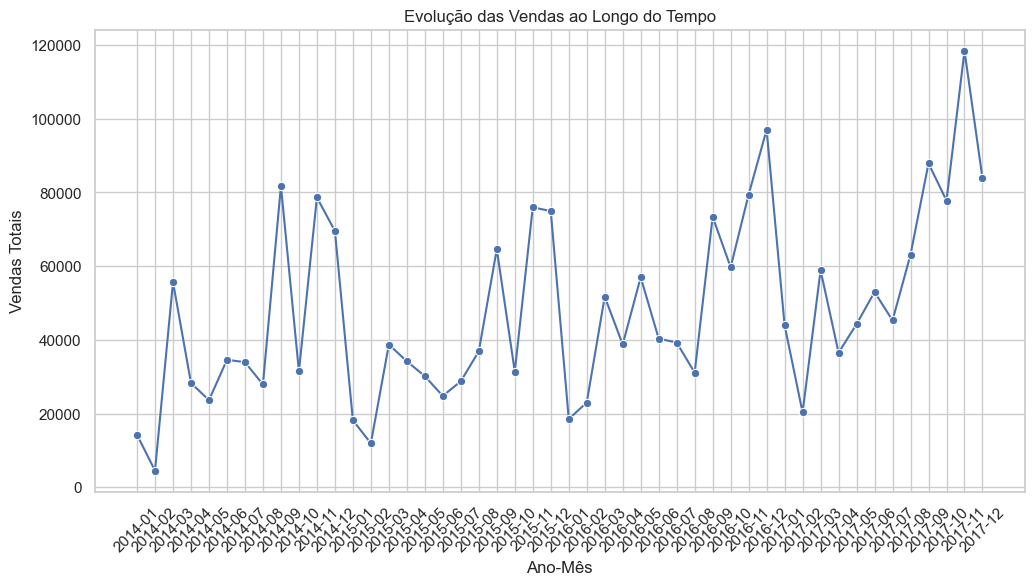

In [224]:
vendas_tempo = (
    df_limpo.groupby('ano_mes')['vendas']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_tempo, x='ano_mes', y='vendas', marker='o')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()


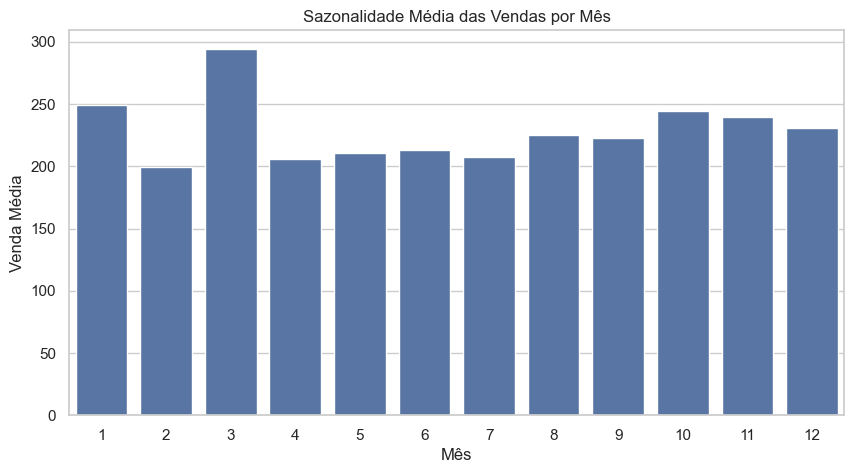

In [225]:
df_limpo['Mes'] = df_limpo['data_pedido'].dt.month

vendas_mes = (
    df_limpo.groupby('Mes')['vendas']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(data=vendas_mes, x='Mes', y='vendas')
plt.title('Sazonalidade Média das Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Venda Média')
plt.show()


In [226]:
analise_segmento = (
    df_limpo.groupby('segmento')[['vendas', 'lucro']]
      .sum()
      .sort_values(by='vendas', ascending=False)
)

analise_segmento


,vendas,lucro
segmento,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


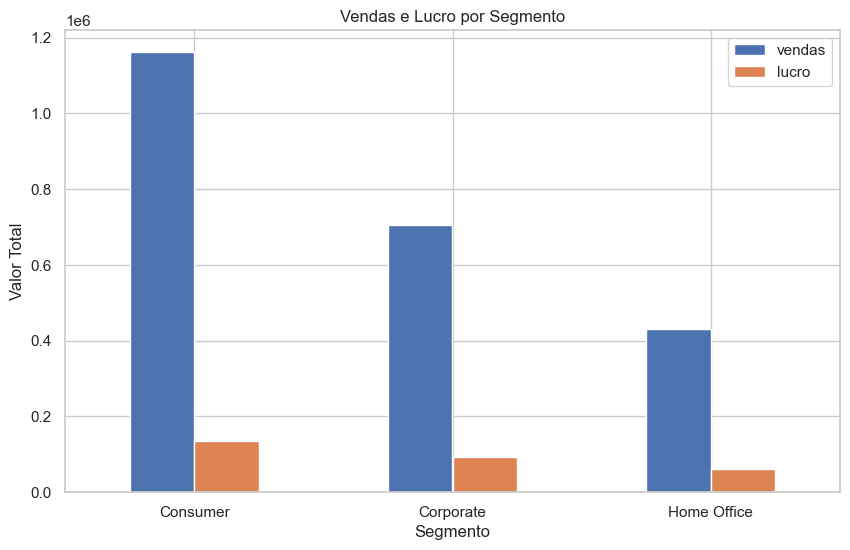

In [227]:
analise_segmento.plot(kind='bar', figsize=(10,6))
plt.title('Vendas e Lucro por Segmento')
plt.ylabel('Valor Total')
plt.xlabel('Segmento')
plt.xticks(rotation=0)
plt.show()


In [228]:
lucro_subcategoria = (
    df_limpo.groupby('subcategoria')[['vendas', 'lucro']]
      .sum()
      .sort_values(by='lucro', ascending=False)
)

lucro_subcategoria.head(10)


,vendas,lucro
subcategoria,,
Copiers,149528.030,55617.8249
Phones,330007.054,44515.7306
Accessories,167380.318,41936.6357
Paper,78479.206,34053.5693
Binders,203412.733,30221.7633
Chairs,328449.103,26590.1663
Storage,223843.608,21278.8264
Appliances,107532.161,18138.0054
Furnishings,91705.164,13059.1436


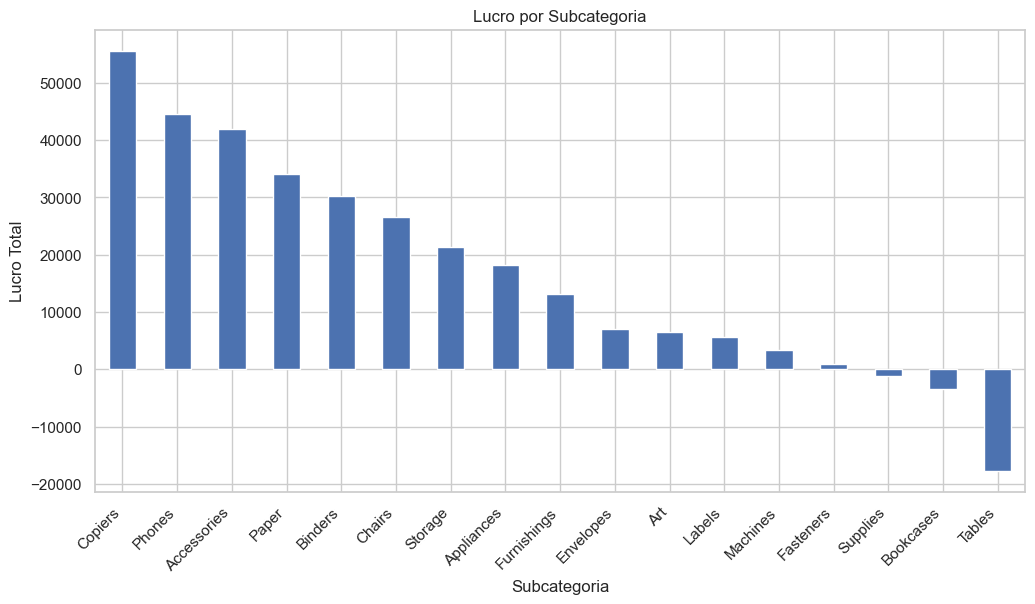

In [229]:
lucro_subcategoria['lucro'].plot(kind='bar', figsize=(12,6))
plt.title('Lucro por Subcategoria')
plt.ylabel('Lucro Total')
plt.xlabel('Subcategoria')
plt.xticks(rotation=45, ha='right')
plt.show()


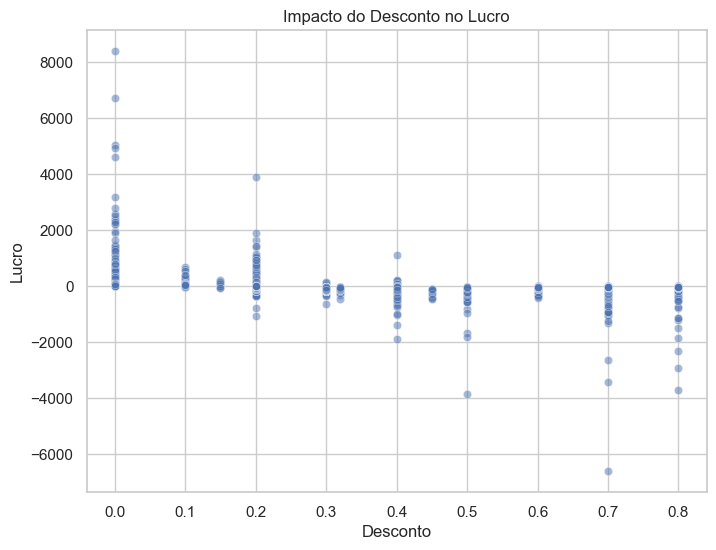

In [230]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_limpo, x='desconto', y='lucro', alpha=0.5)
plt.title('Impacto do Desconto no Lucro')
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.show()


In [231]:
# Tempo de entrega em dias
df_limpo['dias_para_entrega'] = (df_limpo['data_envio'] - df_limpo['data_pedido']).dt.days

df_limpo['dias_para_entrega'].describe()


count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: dias_para_entrega, dtype: float64

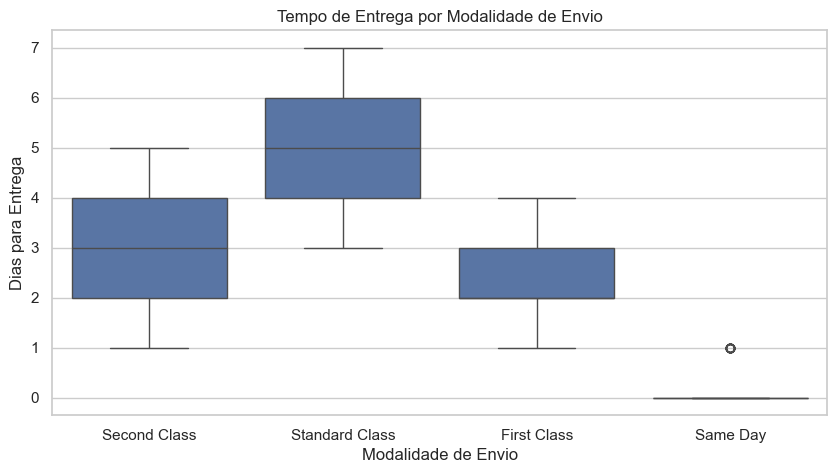

In [232]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_limpo, x='modo_envio', y='dias_para_entrega')
plt.title('Tempo de Entrega por Modalidade de Envio')
plt.xlabel('Modalidade de Envio')
plt.ylabel('Dias para Entrega')
plt.show()


In [233]:
analise_regiao = (
    df_limpo.groupby('regiao')[['vendas', 'lucro']]
    .sum()
    .sort_values(by='vendas', ascending=False)
)

analise_regiao


,vendas,lucro
regiao,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


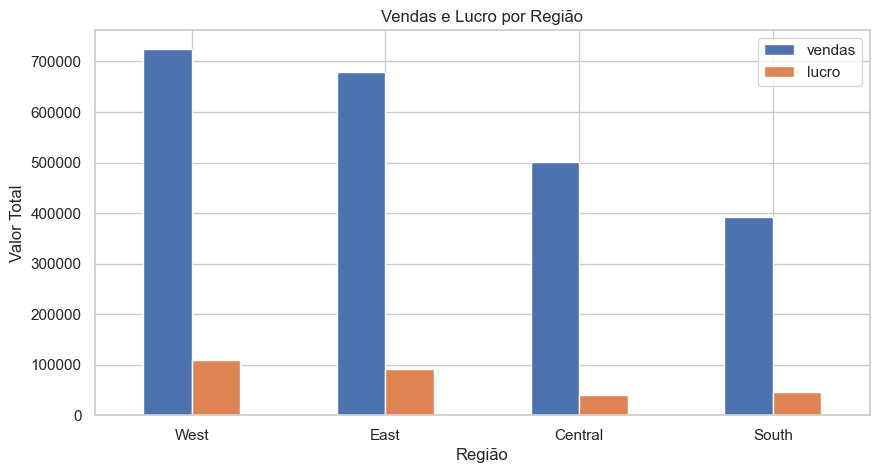

In [234]:
analise_regiao.plot(kind='bar', figsize=(10, 5))
plt.title('Vendas e Lucro por Região')
plt.ylabel('Valor Total')
plt.xlabel('Região')
plt.xticks(rotation=0)
plt.show()


In [235]:
lucro_cliente = (
    df_limpo.groupby('cliente_id')['vendas']
    .sum()
    .sort_values(ascending=False)
)


In [236]:
top_10_pct = int(len(lucro_cliente) * 0.1)

share_top_10 = lucro_cliente.head(top_10_pct).sum() / lucro_cliente.sum()
share_top_10


np.float64(0.3061520473695775)

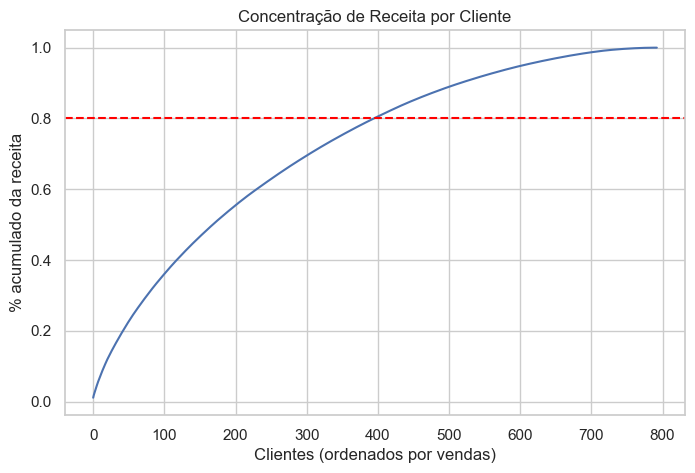

In [237]:
lucro_cliente_acumulado = lucro_cliente.cumsum() / lucro_cliente.sum()

plt.figure(figsize=(8, 5))
lucro_cliente_acumulado.reset_index(drop=True).plot()
plt.axhline(0.8, color='red', linestyle='--')
plt.title('Concentração de Receita por Cliente')
plt.xlabel('Clientes (ordenados por vendas)')
plt.ylabel('% acumulado da receita')
plt.show()


In [238]:
df_limpo['margem_%'] = df_limpo['lucro'] / df_limpo['vendas']


In [239]:
categoria_margem = (
    df_limpo.groupby('categoria')['margem_%']
    .mean()
    .sort_values(ascending=False)
)

categoria_margem


categoria
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: margem_%, dtype: float64

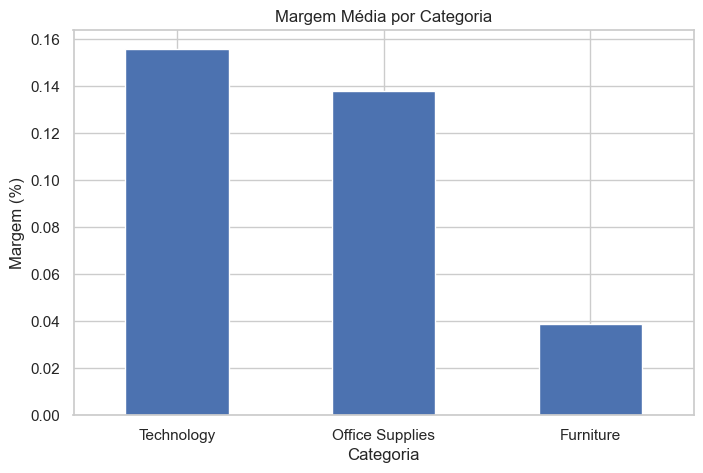

In [240]:
categoria_margem.plot(kind='bar', figsize=(8, 5))
plt.title('Margem Média por Categoria')
plt.ylabel('Margem (%)')
plt.xlabel('Categoria')
plt.xticks(rotation=0)
plt.show()


In [241]:
import json

kpis = {
    "vendas_total": float(df_limpo["vendas"].sum()),
    "lucro_total": float(df_limpo["lucro"].sum()),
    "pedidos": int(df_limpo["pedido_id"].nunique()),
    "ticket_medio": float(df_limpo.groupby("pedido_id")["vendas"].sum().mean())
}

print("KPI_JSON = " + json.dumps(kpis, ensure_ascii=False))


KPI_JSON = {"vendas_total": 2297200.8603000003, "lucro_total": 286397.0216999999, "pedidos": 5009, "ticket_medio": 458.61466566180883}


In [ ]:
import json
import numpy as np

# Histograma com corte p99 (fica MUITO melhor que esmagar com outliers)
v = df_limpo["vendas"].dropna()
p99 = float(v.quantile(0.99))
v2 = v[v <= p99].to_numpy()

counts, edges = np.histogram(v2, bins=40)

# Dados no formato que o Plotly gosta (bar)
x = [float((edges[i] + edges[i+1]) / 2) for i in range(len(counts))]
y = [int(c) for c in counts]
custom = [[float(edges[i]), float(edges[i+1])] for i in range(len(counts))]

fig_payload = {
  "data": [{
    "type": "bar",
    "x": x,
    "y": y,
    "customdata": custom,
    "hovertemplate": "Faixa: R$ %{customdata[0]:,.2f} até R$ %{customdata[1]:,.2f}<br>Frequência: %{y}<extra></extra>",
    "marker": {"opacity": 0.95}
  }],
  "layout": {
    "title": {"text": "Distribuição das Vendas (até P99)", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 55, "l": 70},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "bargap": 0.06,
    "xaxis": {"title": "Vendas (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "yaxis": {"title": "Frequência", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "bar", "x": [31.437950000000004, 93.42585000000001, 155.41375, 217.40165000000002, 279.38955, 341.37745000000007, 403.36535000000003, 465.35325, 527.34115, 589.32905, 651.3169499999999, 713.30485, 775.2927500000001, 837.2806499999999, 899.26855, 961.2564500000001, 1023.2443499999999, 1085.23225, 1147.22015, 1209.20805, 1271.19595, 1333.18385, 1395.17175, 1457.15965, 1519.1475500000001, 1581.13545, 1643.12335, 1705.11125, 1767.09915, 1829.08705, 1891.0749500000002, 1953.06285, 2015.05075, 2077.03865, 2139.02655, 2201.01445, 2263.00235, 2324.99025, 2386.97815, 2448.96605], "y": [5284, 1342, 650, 510, 369, 280, 189, 198, 136, 130, 113, 82, 62, 67, 67, 41, 46, 38, 25, 25, 32, 27, 18, 20, 14, 19, 18, 12, 8, 10, 9, 11, 11, 5, 2, 1, 7, 4, 9, 3], "customdata": [[0.44399999999999995, 62.431900000000006], [62.431900000000006, 124.41980000000001], [124.41980000000001, 186.4077], [186.4077, 248.3956], [248.3956, 310.3835], [310.3835, 372.37140000000005], [372.37140000000005, 434

In [192]:
import json

labels = ["vendas", "lucro", "quantidade", "desconto"]
corr = df_limpo[labels].corr(numeric_only=True).round(3)

z = corr.values.tolist()

# texto dentro das células
text = [[f"{v:.2f}" for v in row] for row in corr.values]

fig_payload = {
  "data": [{
    "type": "heatmap",
    "z": z,
    "x": labels,
    "y": labels,
    "zmin": -1,
    "zmax": 1,
    "text": text,
    "texttemplate": "%{text}",
    "textfont": {"size": 12},
    "hovertemplate": "%{y} × %{x}<br>Correlação: %{z:.2f}<extra></extra>",
    # escala de cor “profissional” (negativo -> neutro -> positivo)
    "colorscale": [
      [0.0, "#ec2f5c"],
      [0.5, "rgba(255,255,255,0.08)"],
      [1.0, "#5fd0d8"]
    ]
  }],
  "layout": {
    "title": {"text": "Correlação entre Variáveis Numéricas", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 50, "l": 90},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "xaxis": {"gridcolor": "rgba(255,255,255,0.08)", "tickangle": 0},
    "yaxis": {"gridcolor": "rgba(255,255,255,0.08)"},
    "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "heatmap", "z": [[1.0, 0.479, 0.201, -0.028], [0.479, 1.0, 0.066, -0.219], [0.201, 0.066, 1.0, 0.009], [-0.028, -0.219, 0.009, 1.0]], "x": ["vendas", "lucro", "quantidade", "desconto"], "y": ["vendas", "lucro", "quantidade", "desconto"], "zmin": -1, "zmax": 1, "text": [["1.00", "0.48", "0.20", "-0.03"], ["0.48", "1.00", "0.07", "-0.22"], ["0.20", "0.07", "1.00", "0.01"], ["-0.03", "-0.22", "0.01", "1.00"]], "texttemplate": "%{text}", "textfont": {"size": 12}, "hovertemplate": "%{y} × %{x}<br>Correlação: %{z:.2f}<extra></extra>", "colorscale": [[0.0, "#ec2f5c"], [0.5, "rgba(255,255,255,0.08)"], [1.0, "#5fd0d8"]]}], "layout": {"title": {"text": "Correlação entre Variáveis Numéricas", "x": 0.02}, "margin": {"t": 55, "r": 20, "b": 50, "l": 90}, "paper_bgcolor": "rgba(0,0,0,0)", "plot_bgcolor": "rgba(0,0,0,0)", "xaxis": {"gridcolor": "rgba(255,255,255,0.08)", "tickangle": 0}, "yaxis": {"gridcolor": "rgba(255,255,255,0.08)"}, "font": {"family": "Inter, system-ui, Arial", "

In [193]:
import json

# vendas por mês
ts = (
    df_limpo
    .groupby("ano_mes", as_index=False)["vendas"]
    .sum()
    .sort_values("ano_mes")
)

x = ts["ano_mes"].tolist()
y = [float(v) for v in ts["vendas"].tolist()]

fig_payload = {
  "data": [{
    "type": "scatter",
    "mode": "lines+markers",
    "x": x,
    "y": y,
    "name": "Vendas",
    "hovertemplate": "Mês: %{x}<br>Vendas: R$ %{y:,.2f}<extra></extra>",
    "line": {"width": 3},
    "marker": {"size": 6}
  }],
  "layout": {
    "title": {"text": "Vendas ao Longo do Tempo (Mensal)", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 55, "l": 80},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "xaxis": {"title": "Ano-Mês", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "yaxis": {"title": "Vendas (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "scatter", "mode": "lines+markers", "x": ["2014-01", "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08", "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03", "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10", "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05", "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12", "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08", "2017-09", "2017-10", "2017-11", "2017-12"], "y": [14236.895, 4519.892, 55691.009000000005, 28295.345, 23648.287, 34595.1276, 33946.393, 27909.4685, 81777.3508, 31453.393, 78628.7167, 69545.6205, 18174.0756, 11951.411, 38726.252, 34195.2085, 30131.6865, 24797.292, 28765.325, 36898.3322, 64595.918000000005, 31404.9235, 75972.5635, 74919.5212, 18542.491, 22978.815000000002, 51715.875, 38750.039, 56987.728, 40344.534, 39261.963, 31115.374300000003, 73410

In [196]:
import json

mes = (
    df_limpo
    .groupby("Mes", as_index=False)["vendas"]
    .mean()
    .sort_values("Mes")
)

# labels PT-BR
mes_nome = {
    1:"Jan",2:"Fev",3:"Mar",4:"Abr",5:"Mai",6:"Jun",
    7:"Jul",8:"Ago",9:"Set",10:"Out",11:"Nov",12:"Dez"
}

x = [mes_nome[int(m)] for m in mes["Mes"].tolist()]
y = [float(v) for v in mes["vendas"].tolist()]

fig_payload = {
  "data": [{
    "type": "bar",
    "x": x,
    "y": y,
    "hovertemplate": "Mês: %{x}<br>Média de vendas: R$ %{y:,.2f}<extra></extra>",
    "marker": {"opacity": 0.95}
  }],
  "layout": {
    "title": {"text": "Sazonalidade — Média de Vendas por Mês", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 55, "l": 80},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "xaxis": {"title": "Mês", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "yaxis": {"title": "Média de vendas (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "bar", "x": ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"], "y": [249.14655013123362, 199.170838, 294.548116091954, 206.23073143712574, 210.92355333333333, 212.9967633193863, 207.37760140845072, 225.27487677053824, 222.45115379609544, 244.59460891330892, 239.60643847722636, 231.03231782670454], "hovertemplate": "Mês: %{x}<br>Média de vendas: R$ %{y:,.2f}<extra></extra>", "marker": {"opacity": 0.95}}], "layout": {"title": {"text": "Sazonalidade — Média de Vendas por Mês", "x": 0.02}, "margin": {"t": 55, "r": 20, "b": 55, "l": 80}, "paper_bgcolor": "rgba(0,0,0,0)", "plot_bgcolor": "rgba(0,0,0,0)", "xaxis": {"title": "Mês", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": false}, "yaxis": {"title": "Média de vendas (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": false}, "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}}}


In [197]:
import json

ticket = (
    df_limpo
    .groupby("categoria", as_index=False)
    .agg(
        vendas_total=("vendas", "sum"),
        quantidade_total=("quantidade", "sum")
    )
)

ticket["ticket_medio"] = ticket["vendas_total"] / ticket["quantidade_total"]

ticket = ticket.sort_values("ticket_medio", ascending=True)

x = [float(v) for v in ticket["ticket_medio"].tolist()]
y = ticket["categoria"].tolist()

fig_payload = {
  "data": [{
    "type": "bar",
    "orientation": "h",
    "x": x,
    "y": y,
    "hovertemplate": "Categoria: %{y}<br>Ticket médio: R$ %{x:,.2f}<extra></extra>",
    "marker": {"opacity": 0.95}
  }],
  "layout": {
    "title": {"text": "Ticket Médio por Categoria", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 40, "l": 110},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "xaxis": {"title": "Ticket médio (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": False},
    "yaxis": {"title": "", "gridcolor": "rgba(255,255,255,0.08)"},
    "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "bar", "orientation": "h", "x": [31.391208940888852, 92.4264817264574, 120.50065326415911], "y": ["Office Supplies", "Furniture", "Technology"], "hovertemplate": "Categoria: %{y}<br>Ticket médio: R$ %{x:,.2f}<extra></extra>", "marker": {"opacity": 0.95}}], "layout": {"title": {"text": "Ticket Médio por Categoria", "x": 0.02}, "margin": {"t": 55, "r": 20, "b": 40, "l": 110}, "paper_bgcolor": "rgba(0,0,0,0)", "plot_bgcolor": "rgba(0,0,0,0)", "xaxis": {"title": "Ticket médio (R$)", "gridcolor": "rgba(255,255,255,0.08)", "zeroline": false}, "yaxis": {"title": "", "gridcolor": "rgba(255,255,255,0.08)"}, "font": {"family": "Inter, system-ui, Arial", "size": 12, "color": "#e9eef8"}}}


In [243]:
import json

TOP_N = 17

sub = (
    df_limpo.groupby("subcategoria", as_index=False)
      .agg(vendas=("vendas","sum"), lucro=("lucro","sum"))
      .sort_values("lucro", ascending=False)
      .head(TOP_N)
)

fig_payload = {
  "data": [{
    "type": "bar",
    "x": sub["subcategoria"].astype(str).tolist(),
    "y": [float(v) for v in sub["lucro"].tolist()],
    "customdata": [[float(v)] for v in sub["vendas"].tolist()],
    "hovertemplate":
      "Subcategoria: %{x}<br>"
      "Lucro: R$ %{y:,.2f}<br>"
      "Vendas: R$ %{customdata[0]:,.2f}"
      "<extra></extra>",
    "marker": {
      "opacity": 0.95
    }
  }],
  "layout": {
    "title": {"text": f"Lucro por Subcategoria (Top {TOP_N})", "x": 0.02},
    "margin": {"t": 55, "r": 20, "b": 110, "l": 70},
    "paper_bgcolor": "rgba(0,0,0,0)",
    "plot_bgcolor": "rgba(0,0,0,0)",
    "xaxis": {
      "title": "",
      "tickangle": -35,
      "gridcolor": "rgba(255,255,255,0.08)"
    },
    "yaxis": {
      "title": "Lucro (R$)",
      "gridcolor": "rgba(255,255,255,0.08)",
      "zeroline": False
    },
    "font": {
      "family": "Inter, system-ui, Arial",
      "size": 12,
      "color": "#e9eef8"
    }
  }
}

print(json.dumps(fig_payload, ensure_ascii=False))


{"data": [{"type": "bar", "x": ["Copiers", "Phones", "Accessories", "Paper", "Binders", "Chairs", "Storage", "Appliances", "Furnishings", "Envelopes", "Art", "Labels", "Machines", "Fasteners", "Supplies", "Bookcases", "Tables"], "y": [55617.82489999999, 44515.730599999995, 41936.6357, 34053.569299999996, 30221.76329999999, 26590.16629999999, 21278.826399999994, 18138.005399999995, 13059.143599999998, 6964.176699999999, 6527.786999999999, 5546.254, 3384.756899999988, 949.5182, -1189.0995000000007, -3472.556000000003, -17725.481100000005], "customdata": [[149528.03], [330007.054], [167380.318], [78479.206], [203412.733], [328449.103], [223843.608], [107532.161], [91705.164], [16476.402000000002], [27118.792], [12486.312], [189238.631], [3024.28], [46673.538], [114879.9963], [206965.532]], "hovertemplate": "Subcategoria: %{x}<br>Lucro: R$ %{y:,.2f}<br>Vendas: R$ %{customdata[0]:,.2f}<extra></extra>", "marker": {"opacity": 0.95}}], "layout": {"title": {"text": "Lucro por Subcategoria (Top 

In [199]:
import numpy as np
import plotly.graph_objects as go

# Agrupa vendas e lucro por segmento
seg = (
    df_limpo
    .groupby("segmento", as_index=False)[["vendas", "lucro"]]
    .sum()
    .sort_values("vendas", ascending=False)
)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=seg["segmento"],
    y=seg["vendas"],
    name="Vendas",
    hovertemplate="Segmento: %{x}<br>Vendas: R$ %{y:,.2f}<extra></extra>",
    opacity=0.95
))

fig.add_trace(go.Bar(
    x=seg["segmento"],
    y=seg["lucro"],
    name="Lucro",
    hovertemplate="Segmento: %{x}<br>Lucro: R$ %{y:,.2f}<extra></extra>",
    opacity=0.95
))

fig.update_layout(
    title=dict(text="Vendas e Lucro por Segmento", x=0.02),
    barmode="group",
    margin=dict(t=55, r=20, b=60, l=70),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(title="Segmento", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    yaxis=dict(title="R$ (Total)", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# imprime JSON no formato compatível com seu padrão atual
import json
print("const FIG_SEGMENTOS = " + fig.to_json() + ";")


const FIG_SEGMENTOS = {"data":[{"hovertemplate":"Segmento: %{x}\u003cbr\u003eVendas: R$ %{y:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","name":"Vendas","opacity":0.95,"x":["Consumer","Corporate","Home Office"],"y":[1161401.345,706146.3668,429653.1485],"type":"bar"},{"hovertemplate":"Segmento: %{x}\u003cbr\u003eLucro: R$ %{y:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","name":"Lucro","opacity":0.95,"x":["Consumer","Corporate","Home Office"],"y":[134119.20919999995,91979.13399999998,60298.67849999999],"type":"bar"}],"layout":{"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinew

In [200]:
import numpy as np
import plotly.express as px

# margem (%) = lucro / vendas
df_m = df_limpo.copy()
df_m["margem_pct"] = np.where(df_m["vendas"] != 0, df_m["lucro"] / df_m["vendas"], np.nan)

# amostra para não ficar pesado no browser
n = 2500
df_plot = df_m.sample(n=min(n, len(df_m)), random_state=42)

fig = px.scatter(
    df_plot,
    x="desconto",
    y="lucro",
    color="margem_pct",
    hover_data={
        "segmento": True,
        "categoria": True,
        "vendas": ":,.2f",
        "margem_pct": ":.1%",
        "desconto": ":.0%",
        "lucro": ":,.2f",
    },
    title="Impacto do Desconto no Lucro (amostra)"
)

fig.update_traces(
    marker=dict(size=7, opacity=0.65),
    hovertemplate=(
        "Desconto: %{x:.0%}<br>"
        "Lucro: R$ %{y:,.2f}<br>"
        "Categoria: %{customdata[0]}<br>"
        "Segmento: %{customdata[1]}<br>"
        "Vendas: R$ %{customdata[2]:,.2f}<br>"
        "Margem: %{customdata[3]:.1%}<extra></extra>"
    )
)

fig.update_layout(
    title=dict(x=0.02),
    margin=dict(t=55, r=20, b=55, l=70),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(
        title="Desconto",
        tickformat=".0%",
        gridcolor="rgba(255,255,255,0.08)",
        zeroline=False
    ),
    yaxis=dict(
        title="Lucro (R$)",
        gridcolor="rgba(255,255,255,0.08)",
        zeroline=False
    ),
    coloraxis_colorbar=dict(title="Margem")
)

print("const FIG_DESCONTO_LUCRO = " + fig.to_json() + ";")


const FIG_DESCONTO_LUCRO = {"data":[{"customdata":[["Corporate","Office Supplies",563.808,0.037499999999999936],["Consumer","Office Supplies",36.672000000000004,0.31249999999999994],["Corporate","Furniture",37.3,0.45999999999999996],["Home Office","Furniture",212.058,-0.0714285714285714],["Consumer","Furniture",171.288,-0.03750000000000015],["Consumer","Office Supplies",99.13600000000001,0.08749999999999994],["Corporate","Technology",340.182,-0.21666666666666673],["Corporate","Office Supplies",17.38,0.5],["Corporate","Office Supplies",22.620000000000005,-0.6666666666666664],["Corporate","Office Supplies",71.632,0.25],["Consumer","Office Supplies",10.475999999999999,-1.6500000000000008],["Home Office","Furniture",76.92,0.4100000000000001],["Consumer","Office Supplies",20.86,0.0699999999999999],["Home Office","Technology",431.97600000000006,-0.17500000000000007],["Corporate","Technology",307.98,0.28999999999999987],["Consumer","Office Supplies",121.79200000000002,0.11249999999999989],["C

In [201]:
import numpy as np
import plotly.express as px

df_l = df_limpo.copy()

# dias de entrega = data_envio - data_pedido (ajuste se seus nomes estiverem diferentes)
df_l["dias_entrega"] = (df_l["data_envio"] - df_l["data_pedido"]).dt.days

# limpa valores esquisitos
df_l = df_l[df_l["dias_entrega"].notna()]
df_l = df_l[df_l["dias_entrega"] >= 0]

# corta outliers (p99)
p99 = df_l["dias_entrega"].quantile(0.99)
df_plot = df_l[df_l["dias_entrega"] <= p99]

fig = px.histogram(
    df_plot,
    x="dias_entrega",
    nbins=30,
    title="Distribuição do Tempo de Entrega (até P99)"
)

fig.update_traces(
    marker=dict(opacity=0.95),
    hovertemplate="Dias: %{x}<br>Frequência: %{y}<extra></extra>"
)

fig.update_layout(
    title=dict(x=0.02),
    margin=dict(t=55, r=20, b=55, l=70),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(title="Dias de entrega", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    yaxis=dict(title="Frequência", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    bargap=0.08,
)

print("const FIG_TEMPO_ENTREGA = " + fig.to_json() + ";")


const FIG_TEMPO_ENTREGA = {"data":[{"alignmentgroup":"True","bingroup":"x","hovertemplate":"Dias: %{x}\u003cbr\u003eFrequ\u00eancia: %{y}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"","marker":{"color":"#636efa","pattern":{"shape":""},"opacity":0.95},"name":"","nbinsx":30,"offsetgroup":"","orientation":"v","showlegend":false,"x":[3,3,4,7,7,5,5,5,5,5,5,5,5,5,4,4,7,2,5,5,5,4,4,2,5,4,4,4,4,4,4,4,4,4,4,2,2,4,4,4,4,5,5,4,2,2,5,5,5,4,4,4,4,6,6,1,1,1,1,1,1,1,6,6,6,6,5,5,5,2,5,3,6,6,6,2,2,2,5,3,3,4,4,5,3,2,7,7,5,5,5,5,5,5,5,6,2,3,5,4,4,4,3,4,4,4,5,5,5,5,5,7,7,2,2,2,2,4,5,3,3,3,3,3,2,5,7,7,4,4,3,3,3,6,6,6,6,6,6,6,2,5,5,5,5,5,6,4,4,4,4,3,3,2,2,2,6,5,4,4,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,4,2,2,4,4,4,5,5,5,4,4,6,6,2,2,2,2,2,6,4,4,7,7,7,5,2,2,4,4,5,6,6,6,6,6,4,7,7,7,7,7,4,4,3,3,3,3,3,3,7,7,7,4,4,4,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,3,3,6,6,6,6,2,2,2,4,2,2,7,5,4,6,4,4,5,1,1,1,1,1,4,4,4,4,2,2,4,6,6,6,2,2,2,4,4,4,4,2,2,2,2,2,6,6,6,6,6,4,5,5,5,5,2,2,2,2,2,6,7,7,2,5,5,5,5,5,5,4,4,2,2,2,

In [202]:
import plotly.express as px

df_l = df_limpo.copy()

# agregação por modo de envio (ajuste nomes se necessário)
agg = (
    df_l.groupby("modo_envio", as_index=False)
      .agg(vendas=("vendas", "sum"),
           lucro=("lucro", "sum"))
)

# transforma para formato "long" para barras agrupadas
agg_long = agg.melt(
    id_vars="modo_envio",
    value_vars=["vendas", "lucro"],
    var_name="metrica",
    value_name="valor"
)

fig = px.bar(
    agg_long,
    x="modo_envio",
    y="valor",
    color="metrica",
    barmode="group",
    title="Vendas e Lucro por Modo de Envio"
)

fig.update_traces(
    marker=dict(opacity=0.95),
    hovertemplate="Modo: %{x}<br>%{legendgroup}: R$ %{y:,.2f}<extra></extra>"
)

fig.update_layout(
    title=dict(x=0.02),
    margin=dict(t=55, r=20, b=70, l=70),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(title="Modo de envio", gridcolor="rgba(255,255,255,0.08)", zeroline=False, tickangle=0),
    yaxis=dict(title="Valor (R$)", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    legend=dict(title="", orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
)

print("const FIG_SHIPMODE = " + fig.to_json() + ";")


const FIG_SHIPMODE = {"data":[{"alignmentgroup":"True","hovertemplate":"Modo: %{x}\u003cbr\u003e%{legendgroup}: R$ %{y:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"vendas","marker":{"color":"#636efa","pattern":{"shape":""},"opacity":0.95},"name":"vendas","offsetgroup":"vendas","orientation":"v","showlegend":true,"textposition":"auto","x":["First Class","Same Day","Second Class","Standard Class"],"xaxis":"x","y":[351428.4229,128363.125,459193.5694,1358215.743],"yaxis":"y","type":"bar"},{"alignmentgroup":"True","hovertemplate":"Modo: %{x}\u003cbr\u003e%{legendgroup}: R$ %{y:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"lucro","marker":{"color":"#EF553B","pattern":{"shape":""},"opacity":0.95},"name":"lucro","offsetgroup":"lucro","orientation":"v","showlegend":true,"textposition":"auto","x":["First Class","Same Day","Second Class","Standard Class"],"xaxis":"x","y":[48969.83989999999,15891.758899999999,57446.63539999999,164088.78749999995],"yaxis":"y","type"

In [207]:
import plotly.express as px

# agrega por estado
geo = (
    df_limpo.groupby("regiao", as_index=False)
      .agg(vendas=("vendas", "sum"),
           lucro=("lucro", "sum"))
)

# top 10 por vendas
top = geo.sort_values("vendas", ascending=False).head(10).copy()

# ordena para ficar “bonito” no barh (menor embaixo, maior em cima)
top = top.sort_values("vendas", ascending=True)

# formato longo para barras agrupadas
top_long = top.melt(
    id_vars="regiao",
    value_vars=["vendas", "lucro"],
    var_name="metrica",
    value_name="valor"
)

fig = px.bar(
    top_long,
    y="regiao",
    x="valor",
    color="metrica",
    orientation="h",
    barmode="group",
    title="Regiões — Vendas e Lucro"
)

fig.update_traces(
    marker=dict(opacity=0.95),
    hovertemplate="Região: %{y}<br>%{legendgroup}: R$ %{x:,.2f}<extra></extra>"
)

fig.update_layout(
    title=dict(x=0.02),
    margin=dict(t=55, r=20, b=45, l=110),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(title="Valor (R$)", gridcolor="rgba(255,255,255,0.08)", zeroline=False),
    yaxis=dict(title="", gridcolor="rgba(255,255,255,0.08)"),
    legend=dict(title="", orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
)

print("const FIG_GEO_RANKING = " + fig.to_json() + ";")


const FIG_GEO_RANKING = {"data":[{"alignmentgroup":"True","hovertemplate":"Regi\u00e3o: %{y}\u003cbr\u003e%{legendgroup}: R$ %{x:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"vendas","marker":{"color":"#636efa","pattern":{"shape":""},"opacity":0.95},"name":"vendas","offsetgroup":"vendas","orientation":"h","showlegend":true,"textposition":"auto","x":[391721.905,501239.8908,678781.24,725457.8245],"xaxis":"x","y":["South","Central","East","West"],"yaxis":"y","type":"bar"},{"alignmentgroup":"True","hovertemplate":"Regi\u00e3o: %{y}\u003cbr\u003e%{legendgroup}: R$ %{x:,.2f}\u003cextra\u003e\u003c\u002fextra\u003e","legendgroup":"lucro","marker":{"color":"#EF553B","pattern":{"shape":""},"opacity":0.95},"name":"lucro","offsetgroup":"lucro","orientation":"h","showlegend":true,"textposition":"auto","x":[46749.43029999999,39706.36249999998,91522.77999999998,108418.44889999997],"xaxis":"x","y":["South","Central","East","West"],"yaxis":"y","type":"bar"}],"layout":{"template":{"data

In [245]:
import numpy as np
import plotly.graph_objects as go

# 1) Receita por cliente (vendas)
cli = (
    df_limpo.groupby("cliente_id", as_index=False)
      .agg(vendas=("vendas", "sum"))
      .sort_values("vendas", ascending=False)
)

# 2) Curva acumulada (% da receita)
cli["rank"] = np.arange(1, len(cli) + 1)
total = cli["vendas"].sum()
cli["cum_share"] = cli["vendas"].cumsum() / total

# 3) Ponto onde bate 80% (opcional, mas fica ótimo)
idx80 = int(np.searchsorted(cli["cum_share"].values, 0.8))
x80 = int(cli.iloc[idx80]["rank"]) if idx80 < len(cli) else int(cli.iloc[-1]["rank"])
y80 = float(cli.iloc[idx80]["cum_share"]) if idx80 < len(cli) else float(cli.iloc[-1]["cum_share"])

fig = go.Figure()

# linha principal
fig.add_trace(go.Scatter(
    x=cli["rank"],
    y=cli["cum_share"],
    mode="lines",
    line=dict(width=3),
    hovertemplate="Cliente (rank): %{x}<br>% acumulado: %{y:.1%}<extra></extra>",
    name="% acumulado"
))

# linha horizontal 80%
fig.add_hline(
    y=0.8,
    line_dash="dash",
    line_width=2,
    line_color="#ec2f5c", 
    opacity=0.95
)

# linha vertical no ponto de 80%
fig.add_vline(
    x=x80,
    line_dash="dot",
    line_width=2,
    opacity=0.9
)

fig.update_layout(
    title=dict(text="Concentração de Receita por Cliente", x=0.02),
    margin=dict(t=55, r=20, b=55, l=70),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Inter, system-ui, Arial", size=12, color="#e9eef8"),
    xaxis=dict(
        title="Clientes (ordenados por vendas) — rank",
        gridcolor="rgba(255,255,255,0.08)",
        zeroline=False
    ),
    yaxis=dict(
        title="% acumulado da receita",
        tickformat=".0%",
        gridcolor="rgba(255,255,255,0.08)",
        range=[0, 1],
        zeroline=False
    ),
    showlegend=False,
)

# imprime no formato “colar no JS”
print("const FIG_CLIENTES_CONCENTRACAO = " + fig.to_json() + ";")
print(f"// 80% da receita é atingido por volta do cliente rank: {x80} ({y80:.1%})")



const FIG_CLIENTES_CONCENTRACAO = {"data":[{"hovertemplate":"Cliente (rank): %{x}\u003cbr\u003e% acumulado: %{y:.1%}\u003cextra\u003e\u003c\u002fextra\u003e","line":{"width":3},"mode":"lines","name":"% acumulado","x":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,22